# Influence of the latent space dimension on the performances of VAE on MNIST

*AIM*: To invesigate how the *latent space distribution* influences the VAE performances (i.e. its ability to build an efficient representation of the MNIST digits).

*MATERIAL & METHOD*: We work on the MNIST digits. The model is trained on 48,000 examples during five epochs ; the only parameter that varies between experiences is the latent space dimension : $d \in \{1, 2, 4, 8, 16, 20, 24, 32, 64, 128\}$. We measure the performance of each model as the mean reconstruction loss (L2) between the inputs $(x_i)_{i \in [1, n]}$ and the outputs $(\hat{x}_i)_{i \in [1, n]}$ after the last epoch of training. This measure is made on the validation dataset (12,000 examples) which were not seen during training.
Since there is some variability during the training of the model, we repeat the measure three times for each latent dimension value.

*DISCUSSION*: when we vary the latent space dimension, in fact the total number of parameters also varies and we couldn't attribute a better performance to a higher latent space dimension or to a larger number of parameters. It's hard to disentangle both effects.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.random import normal
import tensorflow.keras as keras

from tensorflow.keras import Model, Input, layers
from tensorflow.keras.datasets import mnist

print(tf.__version__)

# !nvidia-smi

2.2.0


In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype("float32") / 255 # add width axis
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

In [4]:
from MNIST_anomalies import set_anomaly, predict_anomalies, contour_anomalies, plot_anomalies
from MNIST_anomalies import plot_predictions
from LS_dim_MNIST import Sampling, VAE

In [6]:
# dims = [1, 2, 4, 8, 16, 20, 24, 32, 64, 128]
# files = ["LS_dim_losses", "LS_dim_losses1", "LS_dim_losses2"]

# for k in range(4):
#     l = []
#     for i, dim in enumerate(dims):
#         print(f"Iteration {i}/{len(dims) - 1} --> dim == {dim}")
#         vae = VAE(dim)
#         print(f"VAE latent dim : {vae.latent_dim}")
#         vae.compile(optimizer=keras.optimizers.Adam())
#         history = vae.fit(x_train, epochs=5, batch_size=128, validation_split=0.2)
#         l.append(history.history["val_reconstruction_loss"][-1])    
#     ar = np.array(l)
#     np.save(files[k], ar)

Iteration 0/9 --> dim == 1
VAE latent dim : 1
Epoch 1/5
375/375 [==============================] - 90s 239ms/step - loss: 225.8920 - reconstruction_loss: 223.9613 - kl_loss: 1.9307 - val_reconstruction_loss: 159.6226
Epoch 2/5
375/375 [==============================] - 93s 249ms/step - loss: 143.3336 - reconstruction_loss: 140.1418 - kl_loss: 3.1918 - val_reconstruction_loss: 134.0337
Epoch 3/5
375/375 [==============================] - 93s 249ms/step - loss: 121.4381 - reconstruction_loss: 117.8356 - kl_loss: 3.6025 - val_reconstruction_loss: 117.8155
Epoch 4/5
375/375 [==============================] - 94s 249ms/step - loss: 111.8350 - reconstruction_loss: 108.0485 - kl_loss: 3.7865 - val_reconstruction_loss: 111.8402
Epoch 5/5
375/375 [==============================] - 95s 254ms/step - loss: 106.8636 - reconstruction_loss: 102.9881 - kl_loss: 3.8755 - val_reconstruction_loss: 106.0465
Iteration 1/9 --> dim == 2
VAE latent dim : 2
Epoch 1/5
375/375 [==============================] - 

[[101.8556366   84.72505951  76.0213623   73.19802094  72.59825897
   74.57502747  73.51979828  72.84089661  75.50950623  74.68331909]
 [106.04647064  88.00610352  81.87802887  76.50286102  74.72039795
   75.59632111  82.37017059  75.06172943  80.10916138  75.82035065]]


C:\Users\Hugo\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


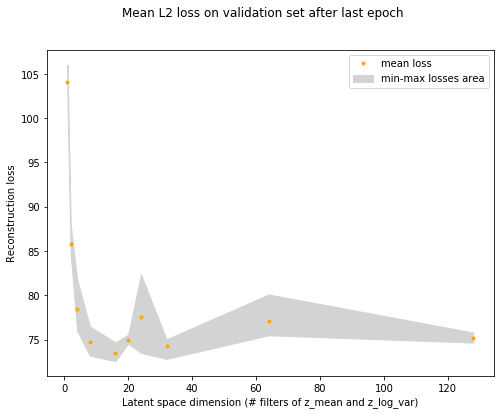

In [22]:
dims = [1, 2, 4, 8, 16, 20, 24, 32, 64, 128]

a1, a2, a3 = np.load("LS_dim_losses.npy"), np.load("LS_dim_losses1.npy"), np.load("LS_dim_losses2.npy")

losses = np.array([[xi for xi in a1], [xi for xi in a2], [xi for xi in a3]])
means = np.mean(losses, axis=0)
bounds = np.array([np.min(losses, axis=0), np.max(losses, axis=0)])

print(bounds)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(dims, means, ".", c="orange", label="mean loss")
ax.fill_between(dims, bounds[0], bounds[1], color="lightgrey", label="min-max losses area")

ax.set_xlabel("Latent space dimension (# filters of z_mean and z_log_var)")
ax.set_ylabel("Reconstruction loss")
ax.legend()
fig.suptitle("Mean L2 loss on validation set after last epoch")
fig.show()

*RESULTS*: We see here that the latent space dimension has a positive effect on the model's performance. However, over some threshold (between 8 and 20), it doesn't improve the performances anymore, maybe has opposite effects. Maybe the degraded performances are due to too much parameters in the models with high latent dimensions.

*CONCLUSION*: We conclude here that the latent space dimension has to be over some optimal value (intuitively to encode/embed all the diversity of MNIST digits with as less ambiguity as possible). Over this optimum, increasing the latent dimension has no benefits and the consequent increase in the number of parameters p 